# 一. 描述一个你曾经完成或参与的数据分析的项目
### 比如智慧供应链项目，见思维导图![思维导图](https://img.77qingliu.com/%E6%99%BA%E6%85%A7%E4%BE%9B%E5%BA%94%E9%93%BE%E9%A1%B9%E7%9B%AE.png)

### A.数据集的大小，包含多少变量/字段？你曾经用过的最大数据是多少？数据的采样是如何进行的？如果是你进行采样，用了什么语言/算法/软件？
数据集大概10亿行记录，50+原始字段。用过的最大数据是百亿行级别。通常采用随机采样方式，在Hadoop hive/Python/SAS里面实现。

### B.在数据处理中，你需要考虑哪些因素，是否需要做数据清洗？是否数据采样有取样偏差（sampling Bias）？
##### 数据处理需要考虑的因素
* 总体数据周期、规则、条件等的选取
* 数据抽样规则，尤其涉及到分层、整群抽样
* 多数据的整合、匹配和关联关系
* 不同数据源和数据间的清洗、转换逻辑
* 重复值、异常值和缺失值的处理逻辑
* 数据离散化的方法选择和区间定义
* 根据变量重要性进行数据变量的选取和降维

在海量数据处理过程中，还需要考虑硬件，处理语句的性能，以及良好的编码习惯等等

##### 涉及到到数据清洗主要包括：
* 逻辑错误清洗
    - 去重
    - 去除不合理的值
    - 修改矛盾的值

* 缺失值清洗
    * 确定关键字段缺失值范围
    * 去除不需要的字段
    * 填补缺失内容

* 数据的标准化和归一化
    * 商品字符的清洗
    * 商品通用名统一
    * 商品分类统一

* 数据的关联性验证
    * 多个来源数据的关联和整合

### C.你采用了什么样的分析/建模方法？是否这些方法符合业界标准？是否对你的数据最优？
建模层面，对于销量预测这种回归问题，主要采用了GBDT的方法，通过手工提取时间序列到特征，采用LightGBM建模。期间也尝试了一些经典到时间序列方法，如MA，ARIMA，FaceBook Prophet，这些模型实践效果不太理想。
上述方法在针对时间序列问题上，是比较广泛使用的方法，在kaggle上也有很多人使用。
针对销量预测问题，我们仅仅使用了单一的，浅层的机器学习模型，如果从模型优化角度，可以从两方面进行优化
* 一个是构造更多更好的特征
* 另一个是可以改进模型，一方面可以尝试通过多模型融合的方式进行优化，另一方面可以尝试一些端到端的深度学习模型，如RNN，LSTM

# 二. 你常用哪些方法清洗/分析数据?  
##### 数据核验
1. 数据格式校验，例如加0，位数，合并等，编码等。
2. 数据逻辑的正确性，例如年龄<100等等

##### 缺失值填补
一般情况下可以通过一些简单的规则和业务逻辑进行填补，如
1. 通过其他信息补全，例如使用身份证件号码推算性别、籍贯、出生日期、年龄等
2. 通过前后数据补全，例如时间序列缺数据了，可以使用前后的均值

也可通过建模的方法，训练算法对缺失值进行预测，例如利用数据集中其他数据的属性，可以构造一棵判定树，来预测缺失值的值。
对于大量缺失且重要性较低对字段选择删除

##### 数据的唯一性
1. 用sql去除重复记录
2. 按规则去重，编写一系列的规则，对重复情况复杂的数据进行去重

##### 数据的权威性
采用最权威的渠道的数据，例如药品可以通过爬虫的方式，采集食药监网站上的药品信息

##### 数据的统一
1. 与业务部门讨论确认，明确不同体系数据的统一标准。
2. 确定规则，对数据进行统一，例如统一单位，统一名称，统一小数点位数

##### 数据的转换
1. 分类变量转换为数值变量
2. 数值变量分段转成字符变量
3. 数据语义转换
4. 行列转换，表拆分等等

##### 解决高维度问题
1. 采用降维，如PCA等方式
2. 进行特征选择

##### 解决多指标数值、单位不同问题
1. 最小-最大归一化
2. box-cox变换

##### 异常值检测和处理
1. 逻辑检测
    * 如判断取值范围的最大最小值进行检测与替换
2. 简单的统计检测
    * 如可通过Z-score进行
    * 统计假设检验
3. 基于模型和算法的检测
    * 有监督的方法，如随机森林，GBDT，逻辑回归等等
    * 无监督的方法，聚类算法如K-means，层次聚类，还有如孤立森林等算法


# 三. 项目测试

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import collections


# Other Libraries
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, average_precision_score, confusion_matrix, precision_recall_curve
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit, cross_val_score, cross_val_predict, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import RFECV
from scipy import stats
import warnings

warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:,.3f}'.format

### 数据处理和清洗

##### 原始数据


In [2]:
train = pd.read_csv("../data/ads_train.csv", index_col=False).drop(columns=['Unnamed: 0'])
train.head()
test = pd.read_csv("../data/ads_test.csv", index_col=False).drop(columns=['Unnamed: 0'])
test.head()

,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins
0,0,nan,1,0.000,0.000,0.000,0.000,72,72,0,0,154,1100
1,0,nan,1,0.000,0.000,0.000,0.000,5,5,0,0,4,12
2,0,nan,1,0.000,0.000,0.000,0.000,42,42,0,0,42,110
3,0,nan,2,0.000,29.792,0.000,-106.188,121,121,0,1,101,401
4,0,nan,2,0.000,21.333,0.000,-108.323,118,118,0,1,163,891


##### 检查目标变量的分布
可以看到目标变量成极端不均衡分布，purchase的数据不到0.5%

后续建模可能要需要resampling

In [3]:
(train['y_buy'].value_counts() / train.shape[0]).to_frame('is_buy')

,is_buy
0,0.995
1,0.005


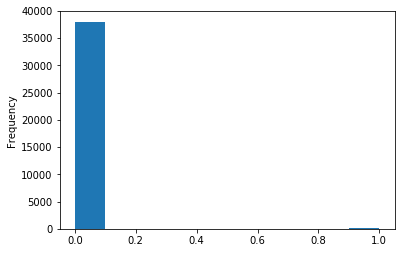

In [4]:
train['y_buy'].value_counts()
train['y_buy'].plot.hist()

##### 检查缺失值
仅有buy_freq这个字段在train 和 test中都存在大量缺失值，后续检查是否有合适的方法补齐数据

In [5]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
    "There are " + str(mis_val_table_ren_columns.shape[0]) +
    " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns
missing_values = missing_values_table(train)
missing_values.head()
missing_values = missing_values_table(test)
missing_values.head()

Your selected dataframe has 14 columns.
There are 1 columns that have missing values.
Your selected dataframe has 13 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
buy_freq,15668,95.700


##### 检查数据类型
仅有几个二分类变量，其余均为数值变量，因此后续不需要针对分类变量进行特殊处理

In [6]:
train.dtypes.value_counts()
# Number of unique classes in each categorycal column
train.select_dtypes('int').apply(pd.Series.nunique, axis = 0).sort_values(ascending=True)
# Only several binary variables

isbuyer              2
multiple_buy         2
multiple_visit       2
y_buy                2
visit_freq          62
last_buy           189
last_visit         189
uniq_urls          207
num_checkins      4076
dtype: int64

##### 检查连续型变量的分布

In [7]:
train.drop(columns=['isbuyer', 'multiple_buy', 'multiple_visit', 'y_buy']).describe()

,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,uniq_urls,num_checkins
count,"1,620.000","38,209.000","38,209.000","38,209.000","38,209.000","38,209.000","38,209.000","38,209.000","38,209.000","38,209.000"
mean,1.240,1.868,0.197,5.862,-0.174,-10.137,64.657,64.657,86.595,723.835
std,0.840,2.997,3.856,17.726,4.784,31.797,53.453,53.453,61.941,"1,286.381"
min,1.000,0.000,0.000,0.000,-181.924,-187.616,0.000,0.000,-1.000,1.000
25%,1.000,1.000,0.000,0.000,0.000,0.000,18.000,18.000,30.000,127.000
50%,1.000,1.000,0.000,0.000,0.000,0.000,50.000,50.000,75.000,319.000
75%,1.000,2.000,0.000,0.125,0.000,0.000,105.000,105.000,155.000,803.000
max,15.000,84.000,174.625,184.917,84.286,91.402,188.000,188.000,206.000,"37,091.000"


* 观察到num_checkins变量取值范围较大，考虑采用normalize进行标准化
* expected_time_buy	和 expected_time_visit 存在负值，不明确是否是数据问题，暂时不做处理
* last_visit 和 last_buy的分布一模一样，可能是重复字段

In [8]:
# Replace negtive values in uniq_urls with 0
train['uniq_urls'] = np.where(train['uniq_urls'] < 0, 0, train['uniq_urls'])
test['uniq_urls'] = np.where(test['uniq_urls'] < 0, 0, test['uniq_urls'])

# Normalize the num_checkins features as it has extremely wide range
train['num_checkins'], alpha = stats.boxcox(train['num_checkins'])
test['num_checkins'] = stats.boxcox(test['num_checkins'], alpha=alpha)[0]

### 补齐buy_freq缺失值
通过数据逻辑核查，发现可以通过multiple_buy这个字段进行逻辑判断，直接填补缺失值

In [9]:
# 核查有多次购买(multiple_buy), 但无2次以上历史购买的数据
train.query("multiple_buy == 1 and buy_freq < 2")
# 核查未有多次购买(multiple_buy), 但有2次以上历史购买的数据
train.query("multiple_buy == 0 and buy_freq > 1")
# 没有发现数据问题, 检查buy_freq缺失字段等分布
train[train['buy_freq'].isnull()]['multiple_buy'].value_counts()

# 可以看到buy_freq缺失的数据，multiple_buy都为0，因此这里通过multiple_buy这个字段，通过简单逻辑将buy_freq的缺失值填补为1
train['buy_freq'] = np.where(train['buy_freq'].isnull(), 1, train['buy_freq'])
test['buy_freq'] = np.where(test['buy_freq'].isnull(), 1, test['buy_freq'])

### 字段含义猜测

expected_time_buy - 预期购买时间

expected_time_visit - 预期浏览时间

multiple_buy - 多次购买

multiple_visit - 多次浏览

### EDA

##### 变量间互相关

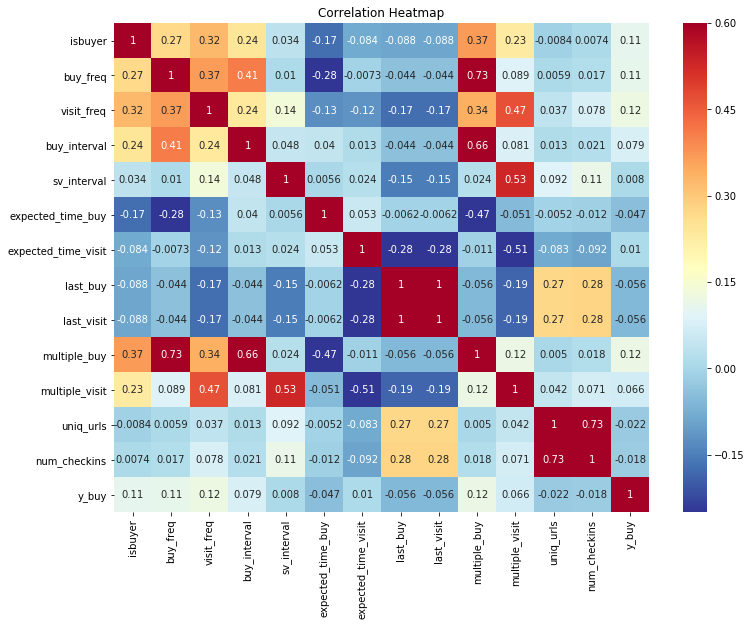

In [10]:
plt.figure(figsize = (12, 9))

# Heatmap of correlations
sns.heatmap(train.corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

* 可以看到last_buy 和 last_visit之间相关系数为1，这两个特征是重复的，直接删除last_visit
* 部分变量比如购买频次和多次购买，购买间隔和多次购买之间存在强线性相关，后续线性回归可能要考虑多重共线性问题

In [11]:
train.drop(columns={'last_visit'}, inplace=True)
test.drop(columns={'last_visit'}, inplace=True)

##### 自变量与目标变量的相关性

In [12]:
# Find correlations with the target and sort
correlations = train.corr()['y_buy'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
plt.style.use('fivethirtyeight')

Most Positive Correlations:
 last_buy              -0.056
expected_time_buy     -0.047
uniq_urls             -0.022
num_checkins          -0.018
sv_interval            0.008
expected_time_visit    0.010
multiple_visit         0.066
buy_interval           0.079
isbuyer                0.108
buy_freq               0.109
multiple_buy           0.122
visit_freq             0.123
y_buy                  1.000
Name: y_buy, dtype: float64


访问频次和多次购买和目标变量相关程度最大

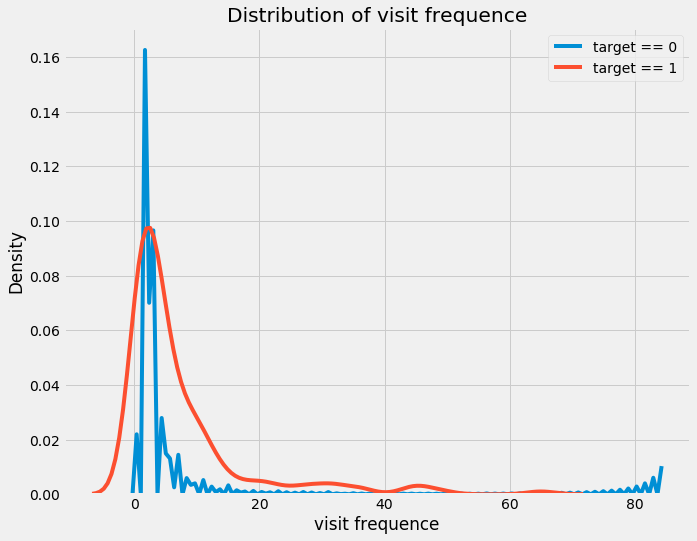

In [13]:
plt.figure(figsize = (10, 8))
# KDE plot of loans that were repaid on time
sns.kdeplot(train.loc[train['y_buy'] == 0, 'visit_freq'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train.loc[train['y_buy'] == 1, 'visit_freq'], label = 'target == 1')
# Labeling of plot
plt.xlabel('visit frequence'); plt.ylabel('Density'); plt.title('Distribution of visit frequence');

##### 其他自变量和目标变量的相关性

<Figure size 432x288 with 0 Axes>

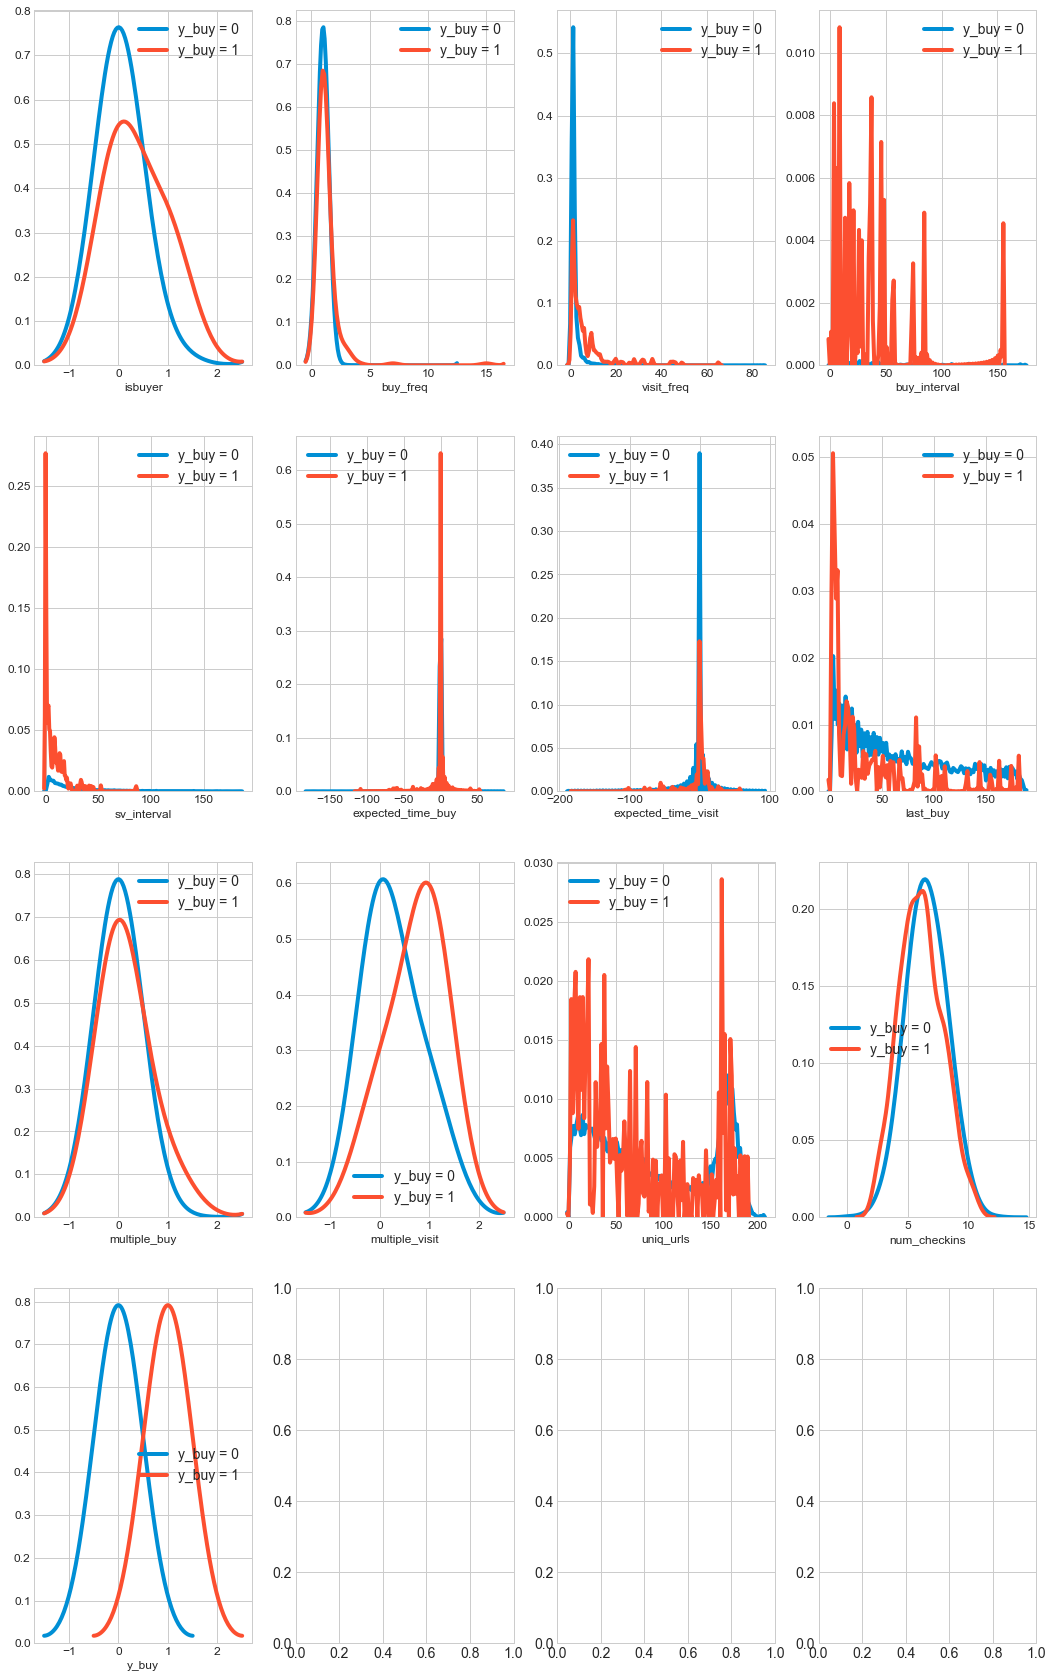

In [14]:
var = train.columns.values

i = 0
t0 = train.loc[train['y_buy'] == 0]
t1 = train.loc[train['y_buy'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(4,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(4,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="y_buy = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="y_buy = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();


过去是否有购买，是否多次购买等是目标变量等强预测指标

### 模型和算法

##### 对原始训练数据集进行重新划分，这里采用stratified对目标变量进行分层，保证目标变量在train/test之间的分布一致

In [15]:
sKF = StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

In [16]:
# Splitting training/testing dataset
X = train.drop('y_buy', axis=1)
y = train['y_buy']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print('new train: ', train_counts_label[1]/ len(original_ytrain))
print('new test: ', test_counts_label[1]/ len(original_ytest))

print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

Train: [13085 26036 31558 ... 36544  6983 17376] Test: [36163  2901 20239 ...   490  2176 13356]
Train: [19277 30571 35442 ...  4022 10422 34334] Test: [20455 27435 21583 ... 36545  1446 10299]
Train: [26030  6997 19752 ...  1873  1585 16940] Test: [24688 17469   709 ...  1403 29257 16925]
Train: [30884 30421 32139 ... 35376  3381 18201] Test: [17189 33552 28708 ... 17623 31420 21686]
Train: [34491 23359  2938 ... 19037 30341  1488] Test: [30657 13845 27787 ...  8095 31783 29389]
----------------------------------------------------------------------------------------------------
Label Distributions: 

new train:  0.004514672686230248
new test:  0.004449097095001309
Length of X (train): 30567 | Length of y (train): 30567
Length of X (test): 7642 | Length of y (test): 7642


### 1. 未对数据进行resample

##### 先采用简单分类模型，观测模型的效果
* Logisitc回归
* KNN
* 决策树
* 随机森林

In [17]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}
for key, classifier in classifiers.items():
    classifier.fit(X, y)
    training_score = cross_val_score(classifier, X, y, cv=sKF, scoring='roc_auc')
    print("Classifiers: ", 
            classifier.__class__.__name__, 
          "Has a training score of {0:.2f} auc score".format(round(training_score.mean(), 2))
         )

Classifiers:  LogisticRegression Has a training score of 0.85 auc score
Classifiers:  KNeighborsClassifier Has a training score of 0.56 auc score
Classifiers:  DecisionTreeClassifier Has a training score of 0.51 auc score
Classifiers:  RandomForestClassifier Has a training score of 0.62 auc score


##### 对模型进行超参优化调整，比较模型效果

Logistic Regression

In [18]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'class_weight':[None, 'balanced']}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=sKF)
grid_log_reg.fit(X, y)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

K Nearest Neighbours

In [19]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, cv=sKF)
grid_knears.fit(X, y)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

DecisionTree Classifier

In [20]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=sKF)
grid_tree.fit(X, y)
# tree best estimator
tree_clf = grid_tree.best_estimator_

In [21]:
for classifier in [log_reg, knears_neighbors, tree_clf]:
    classifier.fit(X, y)
    training_score = cross_val_score(classifier, X, y, cv=sKF, scoring='roc_auc')
    print("Classifiers: ", 
            classifier.__class__.__name__, 
          "Has a training score of {0:.2f} auc score".format(round(training_score.mean(), 2))
         )

Classifiers:  LogisticRegression Has a training score of 0.76 auc score
Classifiers:  KNeighborsClassifier Has a training score of 0.52 auc score
Classifiers:  DecisionTreeClassifier Has a training score of 0.72 auc score


Logistic Regression:  0.7569983113137698
KNears Neighbors:  0.4999737098088703
Decision Tree Classifier:  0.5


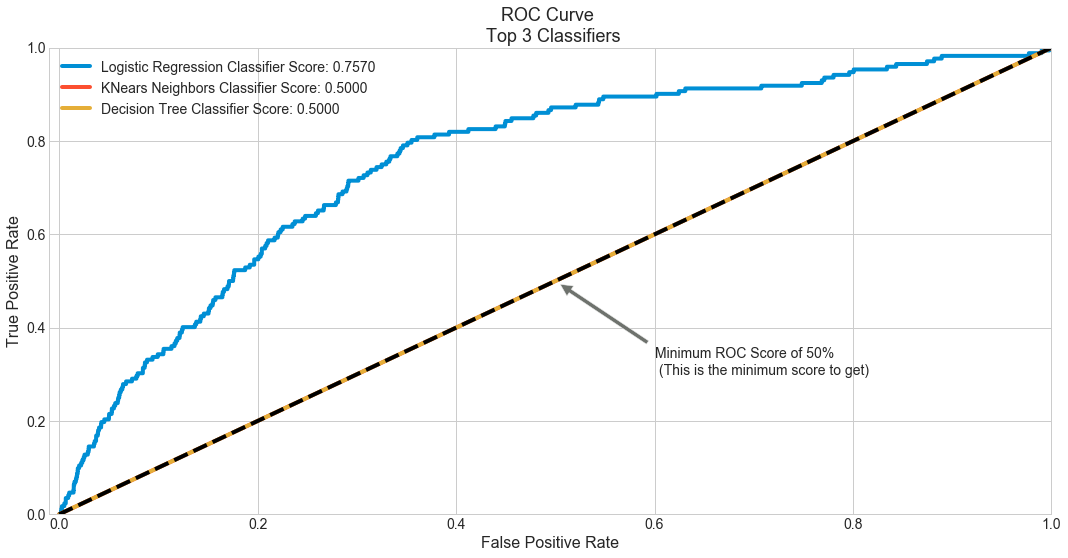

In [22]:
log_reg_pred = cross_val_predict(log_reg, X, y, cv=sKF,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X, y, cv=sKF)

tree_pred = cross_val_predict(tree_clf, X, y, cv=sKF)
print('Logistic Regression: ', roc_auc_score(y, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y, knears_pred))
print('Decision Tree Classifier: ', roc_auc_score(y, tree_pred))


log_fpr, log_tpr, log_thresold = roc_curve(y, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y, knears_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y, tree_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y, knears_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr)
plt.show()

Logisitic回归模型效果较好

### 2. 采用SMOTE resample方法，重新评估模型效果

Classifiers:  LogisticRegression Has a training score of 0.79 auc score
Classifiers:  KNeighborsClassifier Has a training score of 0.54 auc score
Classifiers:  DecisionTreeClassifier Has a training score of 0.77 auc score


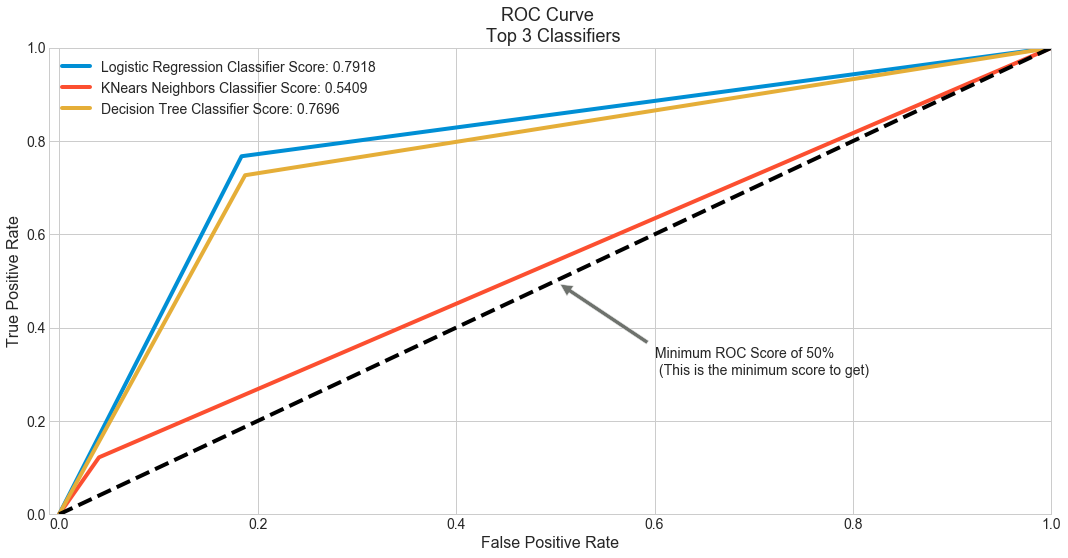

In [23]:
def SMOTE_classify(classifier):
    predictions = pd.Series()
    auc = []
    for train, test in sKF.split(X, y):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), classifier)
        model = pipeline.fit(X.loc[train], y.loc[train])
        prediction = pd.Series(model.predict(X.loc[test]), index=test)
        predictions = predictions.append(prediction)
        auc.append(roc_auc_score(y.loc[test], prediction))
    print("Classifiers: ", 
                classifier.__class__.__name__, 
              "Has a training score of {0:.2f} auc score".format(round(np.mean(auc), 2))
             )
    return predictions.sort_index()

log_reg_pred = SMOTE_classify(log_reg)
knears_pred = SMOTE_classify(knears_neighbors)
tree_pred = SMOTE_classify(tree_clf)

log_fpr, log_tpr, log_thresold = roc_curve(y, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y, knears_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y, tree_pred)
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr)
plt.show()

可以看到采用resample后模型效果有明显改善

### 3. 基于Logisitic回归且采用SMOTE过采样的模型

* SMOTE过采样

In [24]:
X_resampled, y_resampled = SMOTE().fit_resample(original_Xtrain, original_ytrain)

* 变量选择

这里采用LDA进行变量选择

Optimal number of features : 11


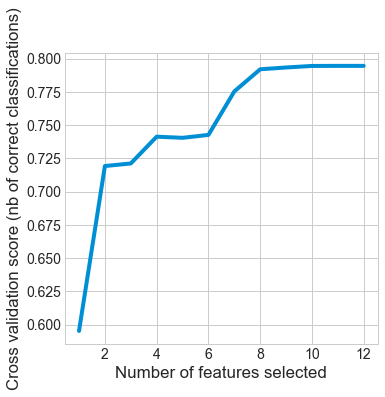

Selected features: 
['isbuyer', 'buy_freq', 'visit_freq', 'buy_interval', 'sv_interval', 'expected_time_visit', 'last_buy', 'multiple_buy', 'multiple_visit', 'uniq_urls', 'num_checkins']


In [25]:
# classifications
lda = LinearDiscriminantAnalysis()
rfecv = RFECV(estimator=lda, step=1, cv=sKF,
              scoring='f1')
rfecv.fit(X_resampled, y_resampled)
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# List of selected features:
features = [f for f,s in zip(X.columns, rfecv.support_) if s]
print("Selected features: \n{0}".format(features))

In [26]:
original_Xtrain, original_Xtest =  original_Xtrain[:,rfecv.support_], original_Xtest[:,rfecv.support_]
X_resampled = X_resampled[:,rfecv.support_]

* Logisitc回归超参数调整

In [27]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'class_weight':[None, 'balanced']}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=sKF)
grid_log_reg.fit(X_resampled, y_resampled)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
grid_log_reg.best_params_

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1'}

* Logistic Regression model with Stratified KFold Validation

In [28]:
predictions = pd.Series()
auc = []
for train, test_ in sKF.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), log_reg)
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    prediction = pd.Series(model.predict(original_Xtrain[test_]), index=test_)
    predictions = predictions.append(prediction)
    auc.append(roc_auc_score(original_ytrain[test_], prediction))
print("Classifiers: ", 
            log_reg.__class__.__name__, 
          "Has a training score of {0:.2f} auc score".format(round(np.mean(auc), 2))
         )

Classifiers:  LogisticRegression Has a training score of 0.77 auc score


Trian on the whole training dataset and make prediction on the test dataset

In [29]:
log_reg.fit(X_resampled, y_resampled)
predict = log_reg.predict(original_Xtest)
roc_auc_score(original_ytest, predict)

0.8083518896517597

##### 选择合适的threshold

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0.9411764705882353
Recall metric in the testing dataset:  0.9117647058823529
Recall metric in the testing dataset:  0.9117647058823529
Recall metric in the testing dataset:  0.8529411764705882
Recall metric in the testing dataset:  0.7647058823529411
Recall metric in the testing dataset:  0.7352941176470589
Recall metric in the testing dataset:  0.7352941176470589
Recall metric in the testing dataset:  0.7058823529411765
Recall metric in the testing dataset:  0.4411764705882353


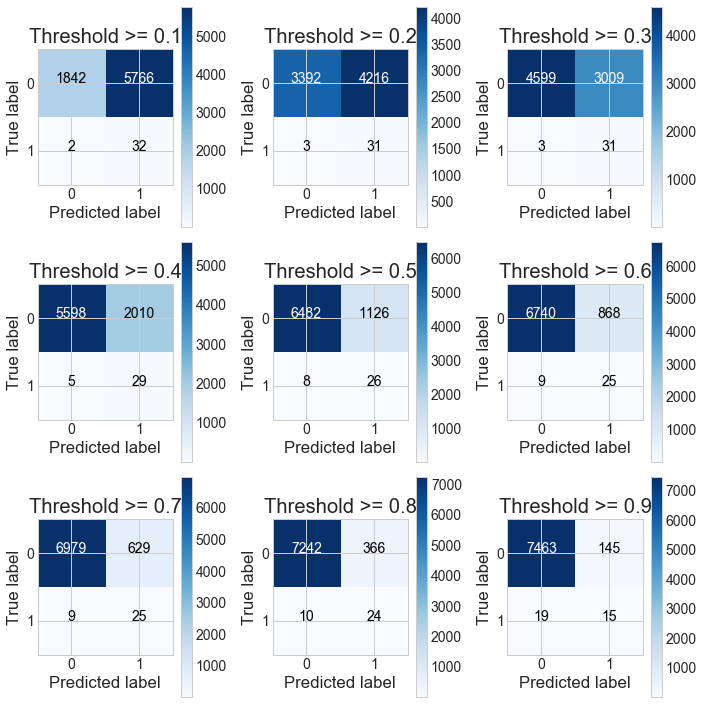

In [31]:
import itertools
predict_proba = log_reg.predict_proba(original_Xtest)
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = predict_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(original_ytest,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

###### Investigate Precision-Recall curve and area under this curve.

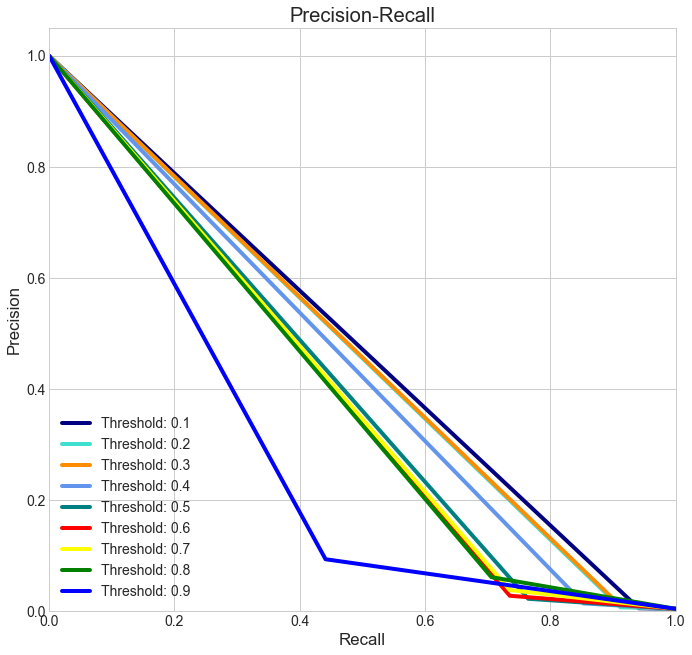

In [32]:
from itertools import cycle

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(10,10))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = predict_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(original_ytest,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall')
    plt.legend(loc="lower left")

### Make final prediciton

In [33]:
X_test = test[features]
predict = log_reg.predict(X_test)
predict_proba = log_reg.predict_proba(X_test)

In [34]:
predict[:5]

array([0, 0, 0, 0, 0])

In [35]:
predict_proba[:5]

array([[0.88, 0.12],
       [0.51, 0.49],
       [0.7 , 0.3 ],
       [0.93, 0.07],
       [0.94, 0.06]])